
# Bioinspired Artificial Intelligence Algorithm - PSO - time allocation


Libraries and hyperparameters

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

w = 0.8
c1 = 0.5
c2 = 0.5



Function particle

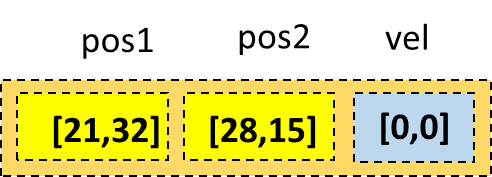

In [2]:
def particle():
  while True:
    particle = []
    pos1 = []
    pos2 = []
    for i in range(6):
      rand = random.randint(0,3) + random.random()
      rand2 = random.randint(0,3) + random.random()
      pos1.append(rand)
      pos2.append(rand2)
    vel = [0,0,0,0,0,0]
    particle.append(pos1)
    particle.append(pos2)
    particle.append(vel)
    if sum(particle[0]) <= 13 and sum(particle[1]) <= 13:
      return particle
      break


In [3]:
x = particle()

print(x[0])
print(x[1])
print(x[2])



[2.642254642264339, 0.03911533387965527, 2.1722366399781117, 0.8400551316182858, 0.8337493321636, 0.05135747692551562]
[1.3571057829958066, 1.5430853255615657, 3.4608491521933358, 0.0677733304907363, 0.3431948814292882, 2.5599217282728284]
[0, 0, 0, 0, 0, 0]


Population of particles

In [4]:
def population(quant):
  particles = []
  for i in range(quant):
    particles.append(particle())
  return particles


In [5]:
pop = population(20)

print(pop[0])
print(pop[2])
print(len(pop))


[[0.820629095582369, 3.306873063246725, 0.18735605837451408, 3.8685665529951856, 0.5178526997374099, 2.89307111787947], [0.7358329661130847, 3.723616915194782, 0.13859492943899876, 0.6002635996687077, 3.7758511884388546, 0.11375056054865795], [0, 0, 0, 0, 0, 0]]
[[2.8878009414365002, 0.6687986347702763, 0.4030437768632271, 0.18687818187472005, 1.9933465830876904, 1.3163337735440686], [0.7052692105305853, 1.6980950271662816, 2.384379884460383, 0.2575226626692392, 3.811156953499187, 3.727990387874686], [0, 0, 0, 0, 0, 0]]
20


Fitness function

In [6]:
def evaluate(particle,indice):
  class1 = [3,2,1,2,4,2.5]
  class2 = [1,4,0,2,4,1.5]
  class3 = [1.5,2.5,1,2,3.5,1.5]
  classes = [class1,class2,class3]
  if sum(particle[indice]) <= 13:
    summ = 0
    for classs in classes:
      count = 0
      while count < len(particle[indice]):
        double = [particle[indice][count],classs[count]]
        minimum = min(double)
        summ += minimum
        count += 1
    return summ/39
  else:
    return 0.01



In [7]:
p = particle()

print(p[0])
print(evaluate(p,0))
print()
print(p[1])
print(evaluate(p,1))



[3.5269192644294187, 1.997920286479478, 2.4819173383342124, 1.1433043729448102, 0.9108158500087132, 2.6492090278162093]
0.6450287571358719

[2.782973286518915, 2.1127580925338862, 0.947832304444828, 0.8527146192952441, 2.4051450939750514, 0.840420992737037]
0.6589486204743165


Personal best - pbest

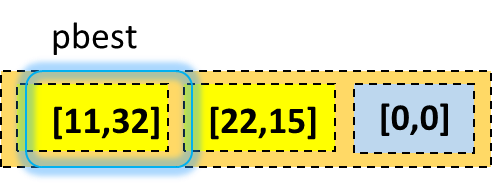

In [8]:
def pbest(particle):
  values = []
  count = 0
  while count < 2:
    if count == 0:
      best = particle[0]
    elif count == 1:
      if evaluate(particle,count) > evaluate(particle,0):
        best = particle [1]
    count += 1
  return best


In [9]:
p = particle()

print(p[0])
print(p[1])
print(pbest(p))
print()
print(evaluate(p,0))
print(evaluate(p,1))



[0.19392493936518707, 1.3560823726728113, 3.4464672206671865, 0.5119400923968219, 2.9791195776635817, 3.181598023302311]
[0.41430958044994526, 1.0572235478331784, 0.49469899892258773, 2.409661615312678, 3.5999092778460664, 3.198842552229135]
[0.41430958044994526, 1.0572235478331784, 0.49469899892258773, 2.409661615312678, 3.5999092778460664, 3.198842552229135]

0.580082075546031
0.707790152266325


Global best - gbest

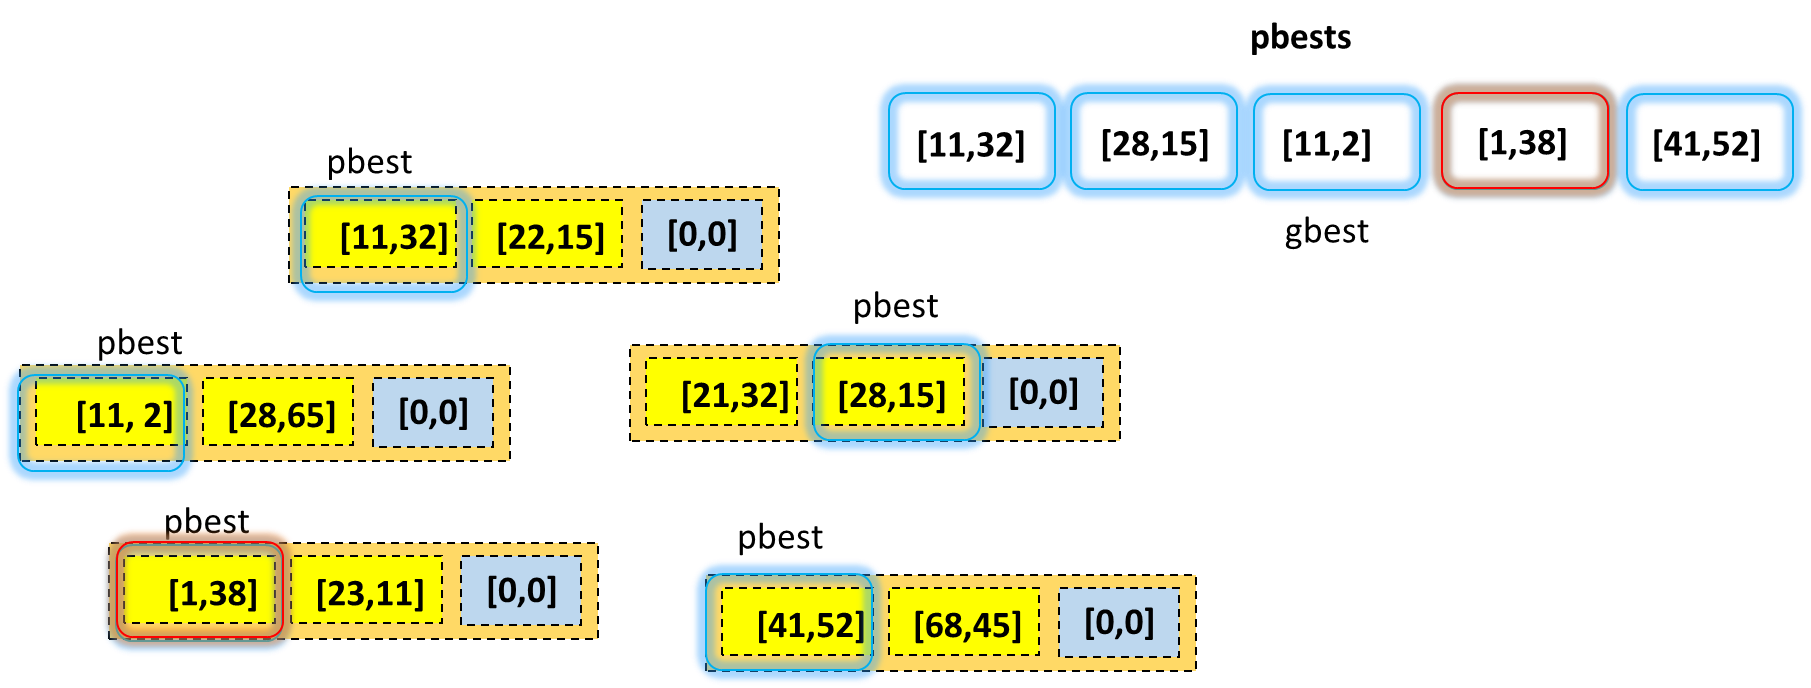

In [10]:
def evaluate_simple(part):
  class1 = [3,2,1,2,4,2.5]
  class2 = [1,4,0,2,4,1.5]
  class3 = [1.5,2.5,1,2,3.5,1.5]
  classes = [class1,class2,class3]
  if sum(part) <= 13:
    summ = 0
    for classs in classes:
      count = 0
      while count < len(part):
        double = [part[count],classs[count]]
        minimum = min(double)
        summ += minimum
        count += 1
    return summ/39
  else:
    return 0.01

def gbest(population_generated):
  pbests = []
  for i in population_generated:
    pbests.append(list(pbest(i)))

  for indice in pbests:
    if pbests.index(indice) == 0:
      gbest = pbests[0]
    else:
      if evaluate_simple(indice) > evaluate_simple(gbest):
        gbest = indice

  return gbest



In [11]:
pop = population(20)
best = gbest(pop)
print(best)
print(evaluate_simple(best))


[0.2943788959114725, 3.421203128488057, 0.974441837076135, 1.7615614262616133, 2.8208446238263094, 2.3594843922484494]
0.7656391290483837


Update of particle velocity

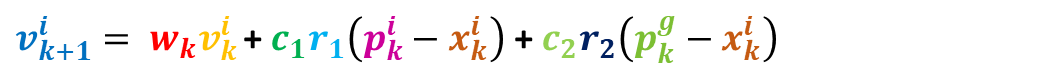

In [12]:
def new_velocity(part,pop):
  r1 = random.random()
  r2 = random.random()
  vel = part[2]
  new_v = w*np.array(vel) + c1*r1*(np.array(pbest(part))-np.array(part[1])) + c2*r2*(np.array(gbest(pop))-np.array(part[1]))
  return new_v


In [13]:
pop = population(20)
p = pop[0]
vel = p[2]
new_vel = new_velocity(p,pop)
print(p)
print(vel)
print(new_vel)





[[2.9104767055837675, 1.7111670470230855, 1.5011849572650626, 2.916167837988685, 0.6809750696429633, 2.3614791535677115], [1.9741782990256738, 2.679959833367982, 3.949968872282505, 1.57644094929718, 2.0206593164418645, 0.27862702554580454], [0, 0, 0, 0, 0, 0]]
[0, 0, 0, 0, 0, 0]
[ 0.13267822 -0.89640261 -2.25322764  0.70347217  0.21016045  1.88478671]


New position and new particle

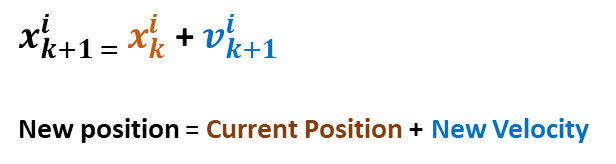

In [14]:
def new_position(p,pop):
  nvel = new_velocity(p,pop)
  new = p[1] + nvel
  return new

def new_particle(p,pop):
  new_p = [np.array(p[0]),new_position(p,pop),new_velocity(p,pop)]
  return new_p


In [15]:
pop1 = population(20)
p1 = pop1[0]
new_part = new_particle(p1,pop1)

print(p1)
print()
print(new_part)




[[0.19078777066563135, 1.3552494929495462, 0.9917093054331437, 0.5500608867581694, 2.2394009141459605, 3.7732842601504046], [1.9309485977131855, 3.5505436822871066, 1.517323383379443, 1.4467289560844367, 1.9249608704070682, 1.8438390116590682], [0, 0, 0, 0, 0, 0]]

[array([0.19078777, 1.35524949, 0.99170931, 0.55006089, 2.23940091,
       3.77328426]), array([1.72620346, 2.67498327, 1.96809288, 1.96954506, 2.55143199,
       1.48469704]), array([-0.1709928 , -0.73122384,  0.37645992,  0.4366296 ,  0.52319704,
       -0.29993724])]


Running the algorithm

Best solution of the population: [2.758044572336138, 1.7104395750448886, 0.49696319836065106, 1.2509593769175713, 2.9154187313800684, 2.60085137167664]
Fitness value of the solution: 0.7533954876688467
11.732676825715957

Best solution of the population: [1.2297815351483283, 2.2081362510026956, 0.7880015585570881, 1.4276587833363956, 3.1634227019065473, 2.070520177729222]
Fitness value of the solution: 0.7768103416121609
10.887521007680277

Best solution of the population: [2.562672478548485, 1.8823040900388934, 0.6729955166338418, 1.158424299379868, 3.833089586495686, 2.3078733460684497]
Fitness value of the solution: 0.820638492285443
12.417359317165223

Best solution of the population: [2.2903428851792507, 2.24834758663437, 0.24657409248052276, 1.779117273688786, 3.523276427242191, 1.3787647774683858]
Fitness value of the solution: 0.8153944936247418
11.466423042693505

Best solution of the population: [2.1502714518319754, 2.391831701163175, 0.5375463853875411, 0.7860764515180305, 4

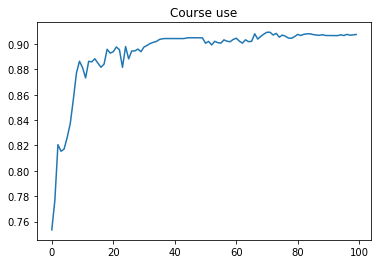

In [16]:
population1 = population(20)
graph = []

for i in range(100):
  best = gbest(population1)
  newPop = []
  for j in population1:
    new_part = new_particle(j,population1)
    newPop.append(new_part)
  population1 = newPop
  graph.append(evaluate_simple(best))

  print(f'Best solution of the population: {best}')
  print(f'Fitness value of the solution: {evaluate_simple(best)}')
  print(sum(best))
  print()


plt.plot(graph)
plt.title('Course use')
plt.show()

